# Pyecharts之词云图(WordCloud)

In [1]:
from snapshot_selenium import snapshot as driver

from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.render import make_snapshot

In [2]:
from pyecharts.globals import CurrentConfig,NotebookType

CurrentConfig.NOTEBOOK_TYPE=NotebookType.JUPYTER_LAB

## 一.基本概念

> class pyecharts.charts.WordCloud

In [ ]:
class WordCloud(
    # 初始化配置项，参考 `global_options.InitOpts`
    init_opts: opts.InitOpts = opts.InitOpts()
)

> func pyecharts.charts.WordCloud.add

In [ ]:
def add(
    # 系列名称，用于 tooltip 的显示，legend 的图例筛选。
    series_name: str,

    # 系列数据项，[(word1, count1), (word2, count2)]
    data_pair: Sequence,

    # 词云图轮廓，有 'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star' 可选
    shape: str = "circle",

    # 自定义的图片（目前支持 jpg, jpeg, png, ico 的格式，其他的图片格式待测试）
    # 该参数支持：
    # 1、 base64 （需要补充 data 头）；
    # 2、本地文件路径（相对或者绝对路径都可以）
    # 注：如果使用了 mask_image 之后第一次渲染会出现空白的情况，再刷新一次就可以了（Echarts 的问题）
    # Echarts Issue: https://github.com/ecomfe/echarts-wordcloud/issues/74
    mask_image: types.Optional[str] = None,

    # 单词间隔
    word_gap: Numeric = 20,

    # 单词字体大小范围
    word_size_range=None,

    # 旋转单词角度
    rotate_step: Numeric = 45,

    # 距离左侧的距离
    pos_left: types.Optional[str] = None,

    # 距离顶部的距离
    pos_top: types.Optional[str] = None,

    # 距离右侧的距离
    pos_right: types.Optional[str] = None,

    # 距离底部的距离
    pos_bottom: types.Optional[str] = None,

    # 词云图的宽度
    width: types.Optional[str] = None,

    # 词云图的高度
    height: types.Optional[str] = None,

    # 允许词云图的数据展示在画布范围之外
    is_draw_out_of_bound: bool = False,

    # 提示框组件配置项，参考 `series_options.TooltipOpts`
    tooltip_opts: Union[opts.TooltipOpts, dict, None] = None,

    # 词云图文字的配置
    textstyle_opts: types.TextStyle = None,

    # 词云图文字阴影的范围
    emphasis_shadow_blur: types.Optional[types.Numeric] = None,

    # 词云图文字阴影的颜色
    emphasis_shadow_color: types.Optional[str] = None,
)

## 二.代码示例

In [18]:
import json

from pyecharts import options as opts
from pyecharts.charts import WordCloud

words = [
    ("花鸟市场", 1446),
    ("汽车", 928),
    ("视频", 906),
    ("电视", 825),
    ("Lover Boy 88", 514),
    ("动漫", 486),
    ("音乐", 53),
    ("直播", 163),
    ("广播电台", 86),
    ("戏曲曲艺", 17),
    ("演出票务", 6),
    ("给陌生的你听", 1),
    ("资讯", 1437),
    ("商业财经", 422),
    ("娱乐八卦", 353),
    ("军事", 331),
    ("科技资讯", 313),
    ("社会时政", 307),
    ("时尚", 43),
    ("网络奇闻", 15),
    ("旅游出行", 438),
    ("景点类型", 957),
    ("国内游", 927),
    ("远途出行方式", 908),
    ("酒店", 693),
    ("关注景点", 611),
    ("旅游网站偏好", 512),
    ("出国游", 382),
    ("交通票务", 312),
    ("旅游方式", 187),
    ("旅游主题", 163),
    ("港澳台", 104),
    ("本地周边游", 3),
    ("小卖家", 1331),
    ("全日制学校", 941),
    ("基础教育科目", 585),
    ("考试培训", 473),
    ("语言学习", 358),
    ("留学", 246),
    ("K12课程培训", 207),
    ("艺术培训", 194),
    ("技能培训", 104),
    ("IT培训", 87),
    ("高等教育专业", 63),
    ("家教", 48),
    ("体育培训", 23),
    ("职场培训", 5),
    ("金融财经", 1328),
    ("银行", 765),
    ("股票", 452),
    ("保险", 415),
    ("贷款", 253),
    ("基金", 211),
    ("信用卡", 180),
    ("外汇", 138),
    ("P2P", 116),
    ("贵金属", 98),
    ("债券", 93),
    ("网络理财", 92),
    ("信托", 90),
    ("征信", 76),
    ("期货", 76),
    ("公积金", 40),
    ("银行理财", 36),
    ("银行业务", 30),
    ("典当", 7),
    ("海外置业", 1),
    ("汽车", 1309),
    ("汽车档次", 965),
    ("汽车品牌", 900),
    ("汽车车型", 727),
    ("购车阶段", 461),
    ("二手车", 309),
    ("汽车美容", 260),
    ("新能源汽车", 173),
    ("汽车维修", 155),
    ("租车服务", 136),
    ("车展", 121),
    ("违章查询", 76),
    ("汽车改装", 62),
    ("汽车用品", 37),
    ("路况查询", 32),
    ("汽车保险", 28),
    ("陪驾代驾", 4),
    ("网络购物", 1275),
    ("做我的猫", 1088),
    ("只想要你知道", 907),
    ("团购", 837),
    ("比价", 201),
    ("海淘", 195),
    ("移动APP购物", 179),
    ("支付方式", 119),
    ("代购", 43),
    ("体育健身", 1234),
    ("体育赛事项目", 802),
    ("运动项目", 405),
    ("体育类赛事", 337),
    ("健身项目", 199),
    ("健身房健身", 78),
    ("运动健身", 77),
    ("家庭健身", 36),
    ("健身器械", 29),
    ("办公室健身", 3),
    ("商务服务", 1201),
    ("法律咨询", 508),
    ("化工材料", 147),
    ("广告服务", 125),
    ("会计审计", 115),
    ("人员招聘", 101),
    ("印刷打印", 66),
    ("知识产权", 32),
    ("翻译", 22),
    ("安全安保", 9),
    ("公关服务", 8),
    ("商旅服务", 2),
    ("展会服务", 2),
    ("特许经营", 1),
    ("休闲爱好", 1169),
    ("收藏", 412),
    ("摄影", 393),
    ("温泉", 230),
    ("博彩彩票", 211),
    ("美术", 207),
    ("书法", 139),
    ("DIY手工", 75),
    ("舞蹈", 23),
    ("钓鱼", 21),
    ("棋牌桌游", 17),
    ("KTV", 6),
    ("密室", 5),
    ("采摘", 4),
    ("电玩", 1),
    ("真人CS", 1),
    ("轰趴", 1),
    ("家电数码", 1111),
    ("手机", 885),
    ("电脑", 543),
    ("大家电", 321),
    ("家电关注品牌", 253),
    ("网络设备", 162),
    ("摄影器材", 149),
    ("影音设备", 133),
    ("办公数码设备", 113),
    ("生活电器", 67),
    ("厨房电器", 54),
    ("智能设备", 45),
    ("个人护理电器", 22),
    ("服饰鞋包", 1047),
    ("服装", 566),
    ("饰品", 289),
    ("鞋", 184),
    ("箱包", 168),
    ("奢侈品", 137),
    ("母婴亲子", 1041),
    ("孕婴保健", 505),
    ("母婴社区", 299),
    ("早教", 103),
    ("奶粉辅食", 66),
    ("童车童床", 41),
    ("关注品牌", 271),
    ("宝宝玩乐", 30),
    ("母婴护理服务", 25),
    ("纸尿裤湿巾", 16),
    ("妈妈用品", 15),
    ("宝宝起名", 12),
    ("童装童鞋", 9),
    ("胎教", 8),
    ("宝宝安全", 1),
    ("宝宝洗护用品", 1),
    ("软件应用", 1018),
    ("系统工具", 896),
    ("理财购物", 440),
    ("生活实用", 365),
    ("影音图像", 256),
    ("社交通讯", 214),
    ("手机美化", 39),
    ("办公学习", 28),
    ("应用市场", 23),
    ("母婴育儿", 14),
    ("游戏", 946),
    ("手机游戏", 565),
    ("PC游戏", 353),
    ("网页游戏", 254),
    ("游戏机", 188),
    ("模拟辅助", 166),
    ("个护美容", 942),
    ("护肤品", 177),
    ("彩妆", 133),
    ("美发", 80),
    ("香水", 50),
    ("个人护理", 46),
    ("美甲", 26),
    ("SPA美体", 21),
    ("花鸟萌宠", 914),
    ("绿植花卉", 311),
    ("狗", 257),
    ("其他宠物", 131),
    ("水族", 125),
    ("猫", 122),
    ("动物", 81),
    ("鸟", 67),
    ("宠物用品", 41),
    ("宠物服务", 26),
    ("书籍阅读", 913),
    ("网络小说", 483),
    ("关注书籍", 128),
    ("文学", 105),
    ("报刊杂志", 77),
    ("人文社科", 22),
    ("建材家居", 907),
    ("装修建材", 644),
    ("家具", 273),
    ("家居风格", 187),
    ("家居家装关注品牌", 140),
    ("家纺", 107),
    ("厨具", 47),
    ("灯具", 43),
    ("家居饰品", 29),
    ("家居日常用品", 10),
    ("生活服务", 883),
    ("物流配送", 536),
    ("家政服务", 108),
    ("摄影服务", 49),
    ("搬家服务", 38),
    ("物业维修", 37),
    ("婚庆服务", 24),
    ("二手回收", 24),
    ("鲜花配送", 3),
    ("维修服务", 3),
    ("殡葬服务", 1),
    ("求职创业", 874),
    ("创业", 363),
    ("目标职位", 162),
    ("目标行业", 50),
    ("兼职", 21),
    ("期望年薪", 20),
    ("实习", 16),
    ("雇主类型", 10),
    ("星座运势", 789),
    ("星座", 316),
    ("算命", 303),
    ("解梦", 196),
    ("风水", 93),
    ("面相分析", 47),
    ("手相", 32),
    ("公益", 90),
]

#with open("wordcloud_image_base64.json", "r", encoding="utf-8") as f:
#    j = json.load(f)


w = (
    WordCloud()
    .add("", words, word_size_range=[12, 55])
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-图片"))
    #.render("wordcloud_custom_mask_image.html")
)

make_snapshot(driver,w.render("gauge.html"),"w.png")

In [19]:
#w.load_javascript()
#w.render_notebook()

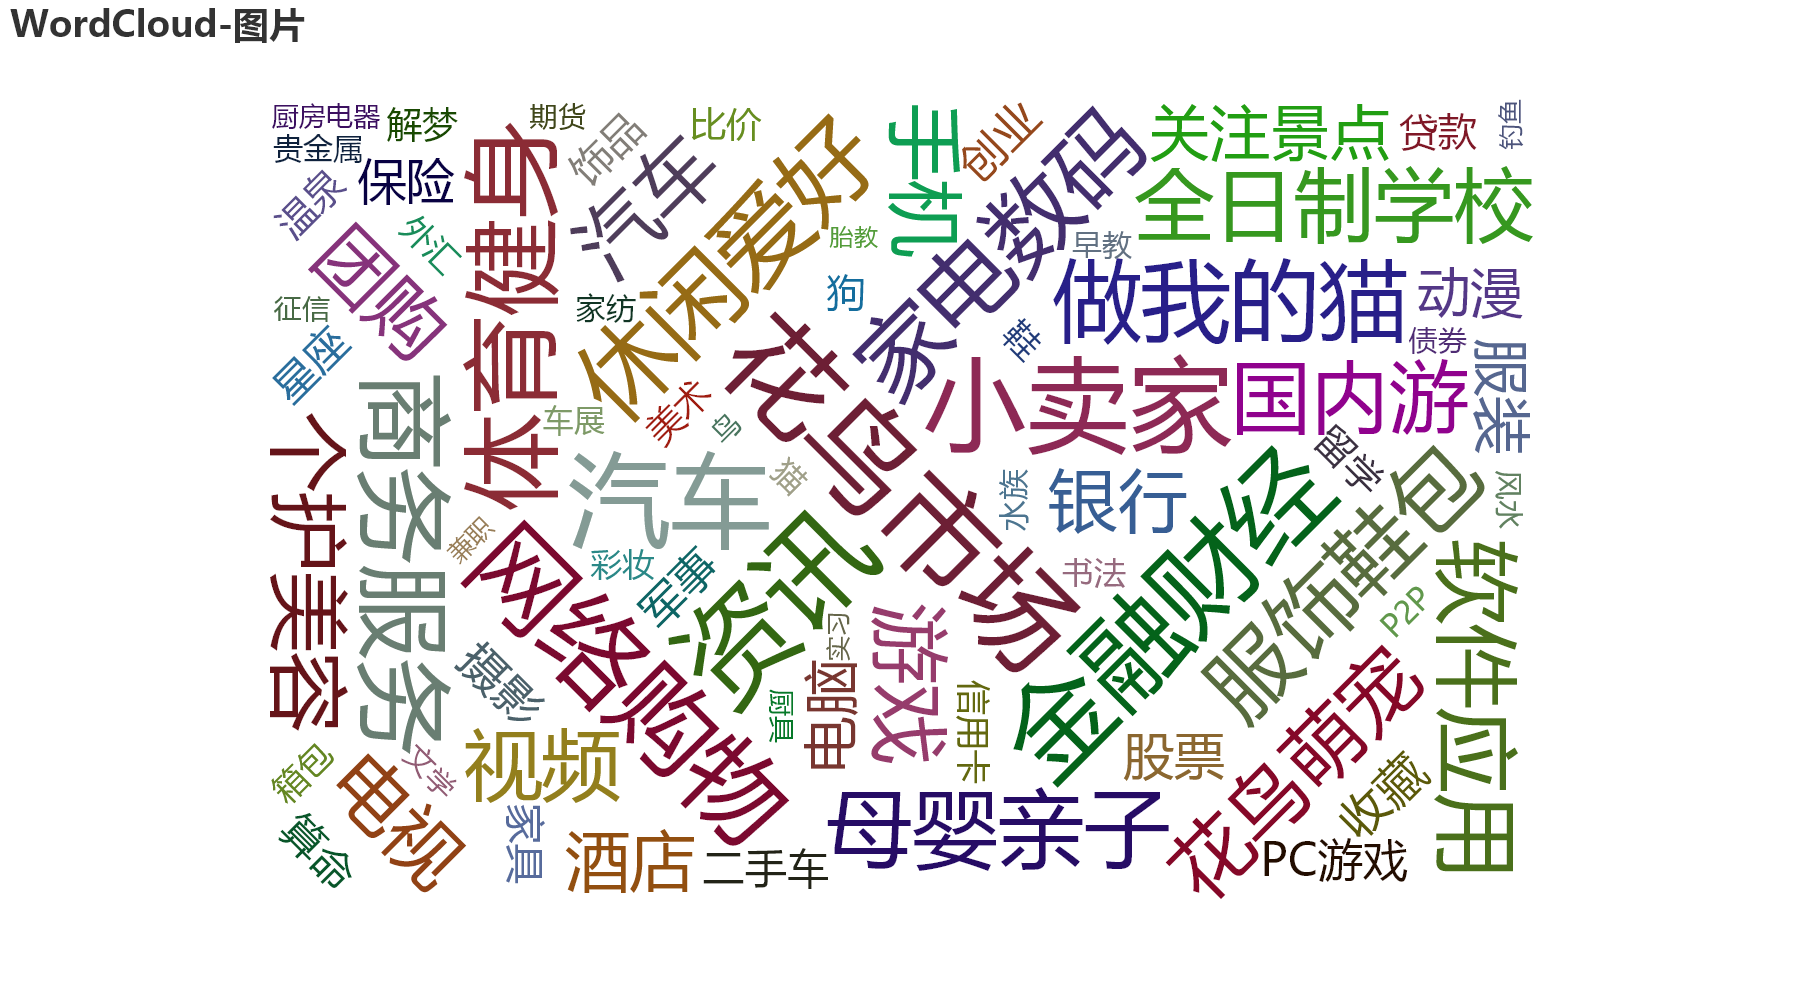

In [20]:
from IPython.display import Image

Image("w.png",width="1000px",height="600px")

## 三.实例展示

> 数据具体处理过程链接：[去哪儿](https://github.com/LQ6H/Python_spider/tree/master/20200402_qunar)

### 1.数据处理

In [10]:
import pandas as pd

data=pd.read_csv("travel2.csv")

data

,地点,短评,出发时间,天数,人均费用,人物,玩法,浏览量
0,婺源,春天的婺源，油菜花开，宛如一幅诗情画意的水墨画,/2020/04/01,5,3000,三五好友,第一次 美食,9055
1,阿联酋,阿联酋｜小狮妹和父母的新年迪拜之旅,/2019/12/10,8,-,-,-,3860
2,AguadePau,来自《一个女生的古巴独行记》（11日自由行攻略）,/2019/09/27,11,20000,独自一人,深度游 美食 摄影 国庆,261
3,建水,云南│我什么也没忘，但有些事只适合收藏,/2019/10/10,8,4000,三五好友,穷游 摄影 古镇 赏秋 国庆,6176
4,日本,日本｜东京の72小时,/2019/09/21,8,-,-,-,1.2万
...,...,...,...,...,...,...,...,...
1994,三亚,【海南】教你如何花最少的钱，玩转不一样的海南,/2019/04/21,4,2500,情侣,短途周末 穷游 摄影 美食 蜜月 五一,4.4万
1995,重庆,#2019五一出游#【重庆】一个人，一背包，一相机从你的全世界路过,/2019/05/01,4,1200,独自一人,短途周末 摄影 美食,2.1万
1996,安庆,自驾安庆，探寻北纬30°线上大别山腹地的奥秘,/2019/05/05,4,2500,-,-,8.3万
1997,衡山,南岳衡山二日游实用攻略,/2019/05/05,2,600,家庭,徒步 五一,8.7万


In [22]:
import re

word_list = []
for i in data['玩法']:
    s = re.split('\xa0',i)
    word_list.append(s)  
dict = {}
for j in range(len(word_list)):
    for i in word_list[j]:
        if i not in dict:
            dict[i] = 1
        else:
            dict[i]+=1
#print(dict)
w = []
for item in dict.items():
    w.append(item)
for i in range(1,len(w)):
    for j in range(0,len(w)-1):
        if w[j][1]<w[j+1][1]:
            w[j],w[j+1] = w[j+1],w[j]
print(w)

[('深度游', 602), ('摄影', 553), ('美食', 501), ('第一次', 414), ('自驾', 388), ('夏季', 301), ('暑假', 294), ('-', 290), ('短途周末', 246), ('海滨海岛', 204), ('国庆', 173), ('冬季', 169), ('穷游', 137), ('古镇', 135), ('赏秋', 130), ('环游', 90), ('徒步', 88), ('春节', 76), ('五一', 70), ('端午', 70), ('中秋节', 62), ('寒假', 58), ('潜水', 53), ('踏春', 51), ('购物', 49), ('跨年', 48), ('人文', 48), ('探险', 44), ('蜜月', 41), ('毕业游', 32), ('漫游', 32), ('圣诞', 31), ('温泉', 29), ('清明', 26), ('赏枫', 21), ('滑雪', 20), ('骑行', 14), ('游轮', 11), ('婚纱', 10), ('万圣节', 6), ('赏樱', 5)]


In [23]:
w = (
    WordCloud()
    .add("", w, word_size_range=[12, 55])
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-旅游"))
    #.render("wordcloud_custom_mask_image.html")
)

make_snapshot(driver,w.render("word_cloud.html"),"w_qunar.png")

In [17]:
#w.load_javascript()
#w.render_notebook()

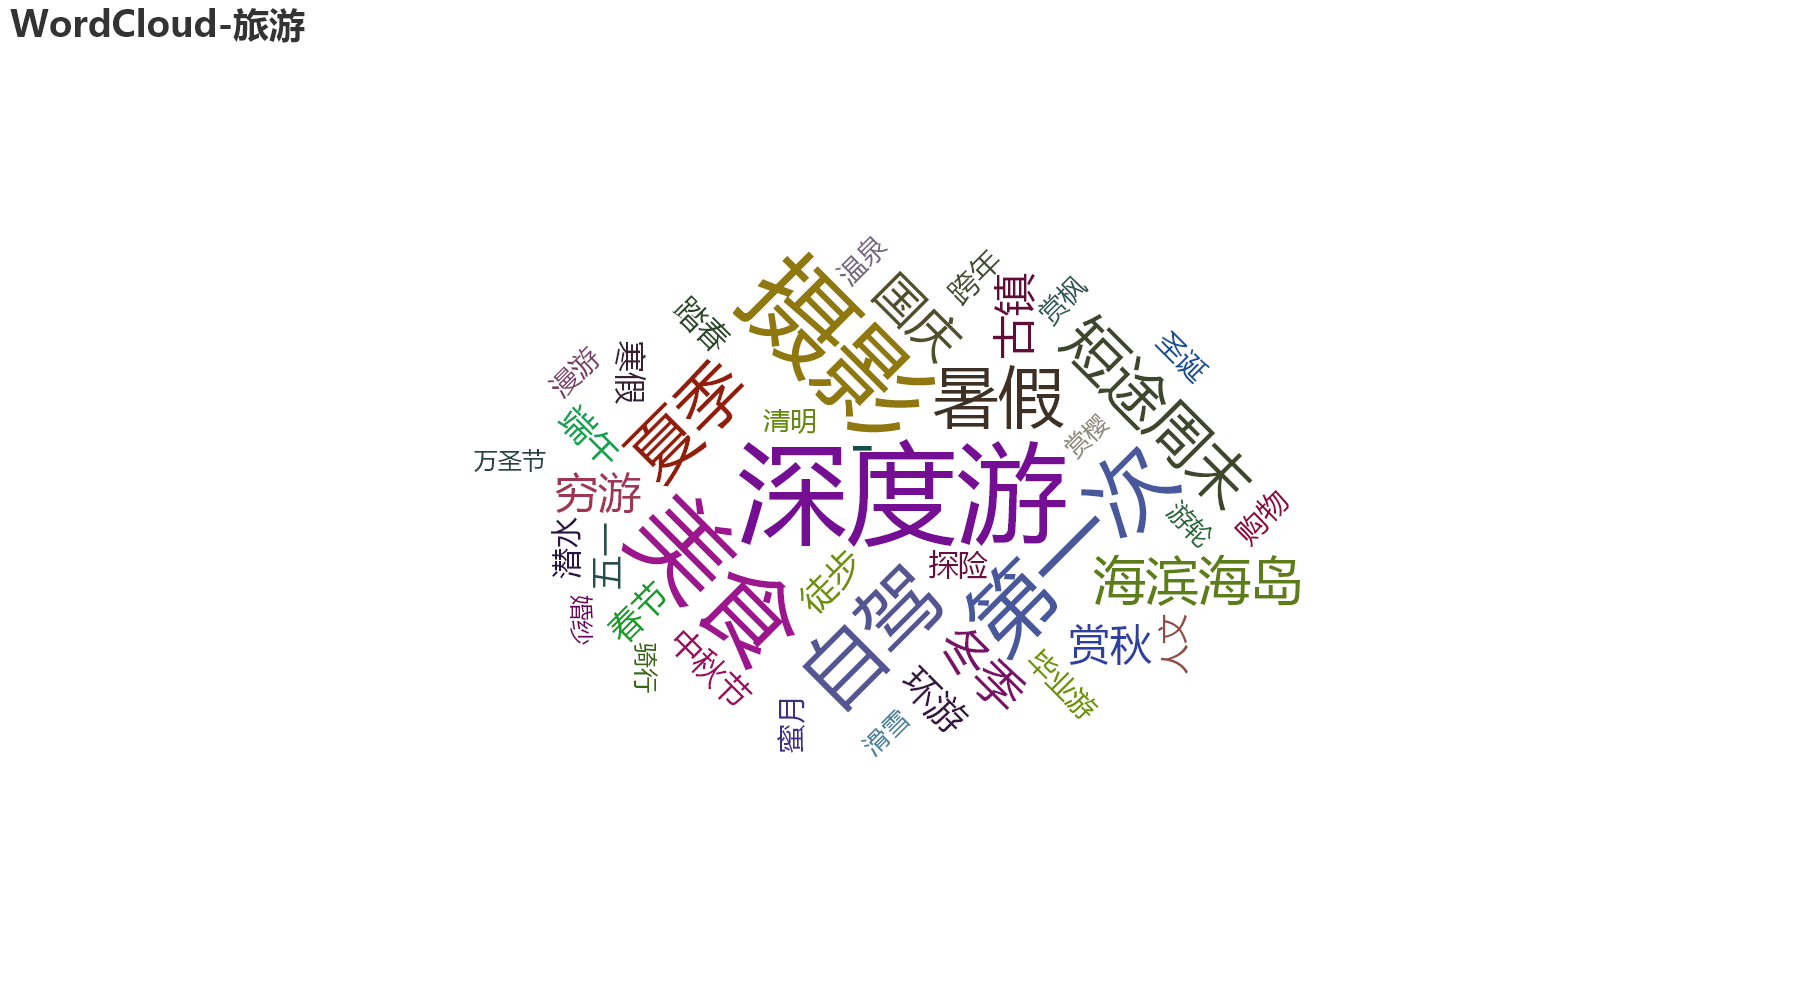

In [24]:
from IPython.display import Image

Image("w_qunar.png",width="1000px",height="600px")